In a sequence of 8 experiments, a sensor is suspended in a wind tunnel to measure the force   experienced (in Newtons) at various wind speeds   (in m/s). The data is stored in the  le wind_tunnel.csv.

Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10.0, 5.0)

data = pd.read_csv("wind_tunnel.csv")
print(type(data))
print(data.head(8))

<class 'pandas.core.frame.DataFrame'>
   speed  force
0     10     25
1     20     70
2     30    380
3     40    550
4     50    610
5     60   1220
6     70    830
7     80   1450


Visualize data

n = 8


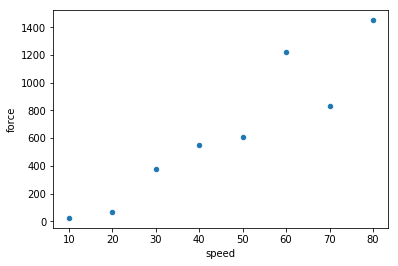

In [2]:
n = len(data) # number of samples
print("n = {}".format(n))
data.plot.scatter(x = "speed", y = "force", marker = "o")
plt.show()

Get our independent variable

In [3]:
y = data.force.values.reshape((n,1))
print(y)


[[  25]
 [  70]
 [ 380]
 [ 550]
 [ 610]
 [1220]
 [ 830]
 [1450]]


Get our independent variable

In [4]:
X = np.hstack((np.ones((n,1), dtype=np.float64), data.speed.values.reshape((n,1))))
print(X)

[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]
 [ 1. 80.]]


FORMULA to calculated the weighted least squares

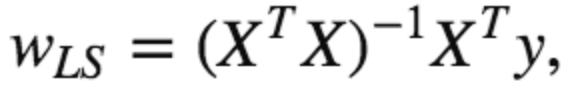

In [5]:
from IPython.display import Image, display
display(Image(filename="FORMULA_LEAST_SQUARES.png", embed=True))

With X and y as matrices, can solve linear system

In [6]:
w_LS = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(w_LS)

[[-234.28571429]
 [  19.4702381 ]]


Alternative way to compute same thing

In [7]:
w_LS = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w_LS)

[[-234.28571429]
 [  19.4702381 ]]


Produce a 2D plot showing original data and the linear model regression line of best fit

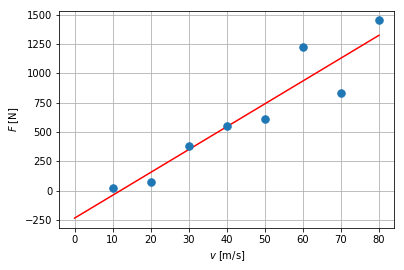

In [8]:
vv = np.linspace(0,80)        # Generate a grid of speed values
#print(vv)
FF = w_LS[0,0] + w_LS[1,0]*vv # Generate the corresponding force values
#print(FF)
#print(y)
plt.plot(vv, FF, 'r', X[:,1], y, 'o', markersize=7.5)

plt.xlabel('$v$ [m/s]')
plt.ylabel('$F$ [N]')
plt.grid(True)
plt.show()

-----

Here, accumulate the sum of squared residuals in ss_rand the sum of total squares (differences from mean of y) in ss_t. These can be used to compute the RMSE and R2

In [9]:
ss_t = 0.0 # For accumulating the total sum of squares (i.e., differences
# of y[k] from y.mean() squared)
ss_r = 0.0 # For accumulating the sum of squared residuals
mean_y = y.mean() # compute once

b0 = w_LS[0,0]
b1 = w_LS[1,0]
for k in range(n):
    y_pred = b0 + b1*X[k,1]
    ss_r += (y_pred - y[k,0])**2
    ss_t += (y[k,0] - mean_y)**2

rmse = np.sqrt(ss_r/n)
r2 = 1 - (ss_r/ss_t)
print("RMSE = {}".format(rmse))
print('R-squared: {}'.format(r2))


RMSE = 164.36170279368028
R-squared: 0.8804852467812263


-------

Root Mean Square Error (RMSE) El error cuadrático medio mide el error que existe entre dos conjuntos de datos los cuales son el valor predecido y el valor real observado o conocido.


Coeficiente de determinación define la proporción de la varianza total de la variable usada en la regresión. Sí r2 tiende a 1 quiere decir que nuestro modelo se ajusta a la variable que estamos intentando explicar. Caso contrario, cuanto mas cerca a cero menos ajustado estará nuestro modelo.